In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('adult.data',names = ['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#drop duplicates

df.drop_duplicates(keep='first',inplace=True)

In [5]:
df.shape

(32537, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


## Obeservation:

1. There are total 32537 rows and 15 columns in the dataset
2. Categorical features = 9 and Numerical features = 6

In [7]:
for i in df.columns:
    print(df[i].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Pr

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Observation:

1. '?' seems to be NaN values

In [9]:
#Check Null values

df.replace(' ?',np.nan,inplace=True) #replacing '?' with NaN

<AxesSubplot: >

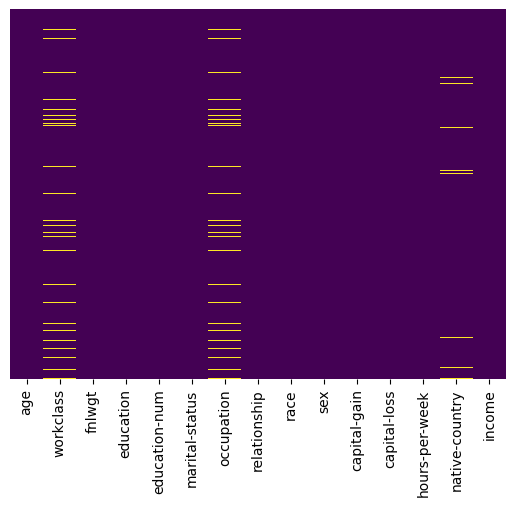

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Observation:

workclass, occupation and native_country has missing values

In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


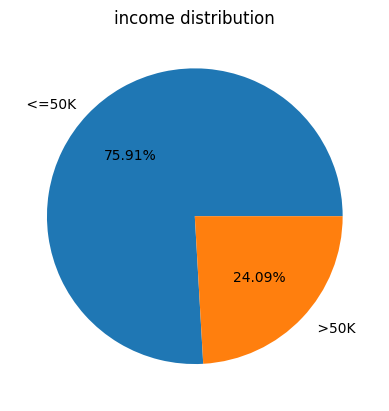

In [87]:
## distribution of our terget varibale -> income
income = df['income'].value_counts()

plt.pie(income,labels=income.index,autopct="%1.2f%%")
plt.title("income distribution")
plt.show()

## Observation:

People with <=50K income: 75.91%

People with >50K income: 24.09%

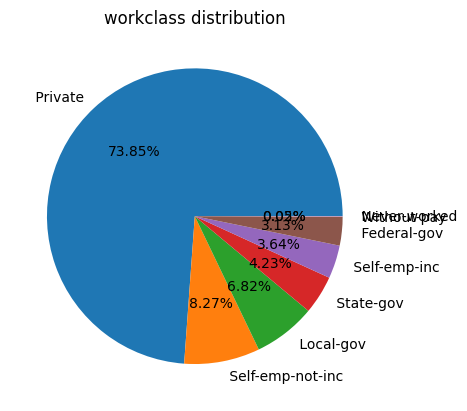

In [88]:
## Distribution of workclass column
temp = df['workclass'].value_counts()

plt.pie(temp,labels=temp.index,autopct="%1.2f%%")
plt.title("workclass distribution")
plt.show()

In [14]:
## Relationship between workclass and income

workclass = df.groupby('workclass')['income']

workclass.value_counts()

workclass          income
 Federal-gov        <=50K      589
                    >50K       371
 Local-gov          <=50K     1476
                    >50K       617
 Never-worked       <=50K        7
 Private            <=50K    17712
                    >50K      4961
 Self-emp-inc       >50K       622
                    <=50K      494
 Self-emp-not-inc   <=50K     1816
                    >50K       724
 State-gov          <=50K      945
                    >50K       353
 Without-pay        <=50K       14
Name: income, dtype: int64

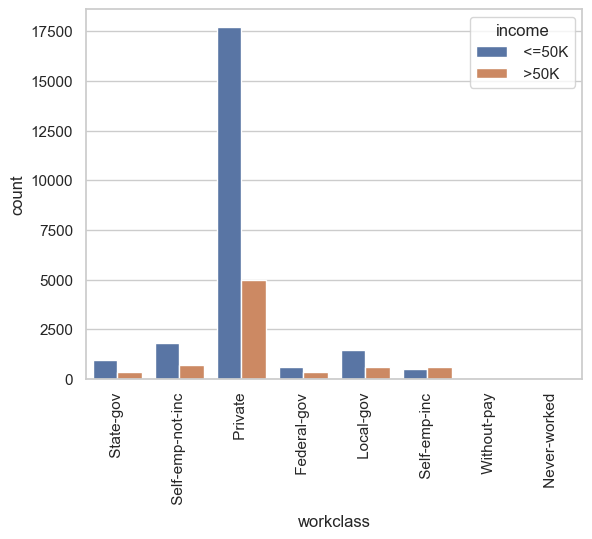

In [104]:
sns.countplot(df,x='workclass',hue='income')
plt.xticks(rotation=90)
plt.show()

## Observation:

1. Most people work in the Private sector
2. In every sector (except self-emp-inc), the number of people who earns <=50K are more than the number of people who earns >50K

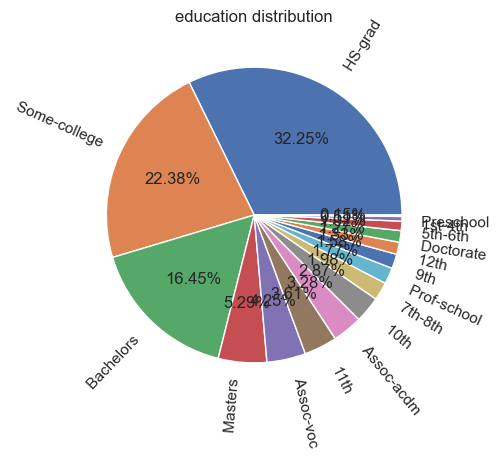

In [106]:
## distribution of education feature

education = df['education'].value_counts()

plt.pie(education,labels=education.index,autopct="%1.2f%%",rotatelabels=True)
plt.title("education distribution")
plt.show()

In [17]:
## Relationship between education and income feature

edu_income = df.groupby('education')['income']
edu_income.value_counts()

education      income
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     160
                >50K        6
 5th-6th        <=50K     316
                >50K       16
 7th-8th        <=50K     605
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3132
                >50K     2221
 Doctorate      >50K      306
                <=50K     107
 HS-grad        <=50K    8820
                >50K     1674
 Masters        >50K      959
                <=50K     763
 Preschool      <=50K      50
 Prof-school    >50K      423
                <=50K     153
 Some-college   <=50K    5896
                >50K     1386
Name: income, dtype: int64

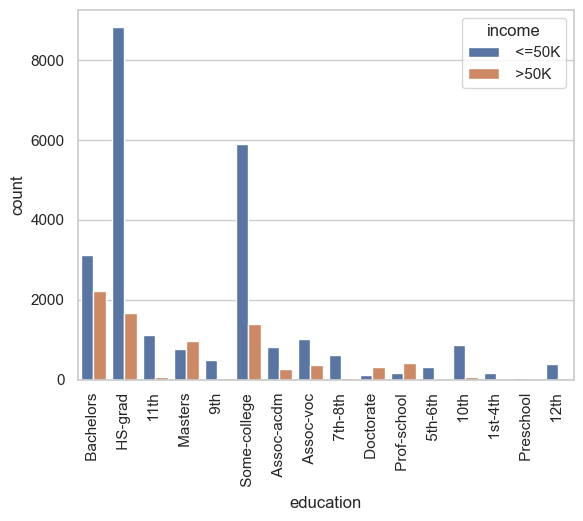

In [107]:
sns.countplot(df,x='education',hue='income')
plt.xticks(rotation=90)
plt.show()

## Observation:

1. In Bachelors, HS-grad, Masters, Doctorate, Prof-school there are more people who are earning money more than 50K.
2. In Master, doctorate and Prof-school - the number of people with income >50K is greater than the number of people with income <=50K

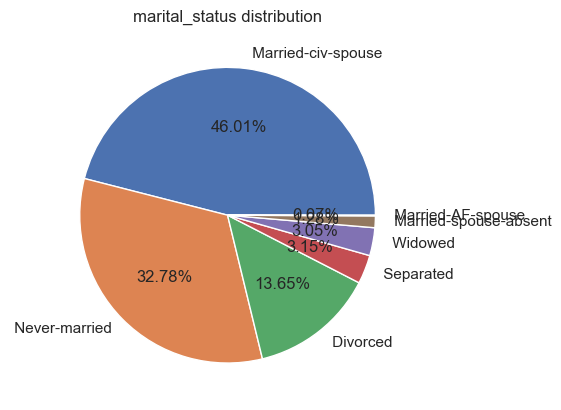

In [109]:
# distribution of Marital status feature

marital_status = df['marital-status'].value_counts()

plt.pie(marital_status,labels=marital_status.index,autopct="%1.2f%%")
plt.title("marital_status distribution")
plt.show()

In [20]:
## Relationship between marital-status and income feature
marital_status_income = df.groupby('marital-status')['income']
marital_status_income.value_counts()

marital-status          income
 Divorced                <=50K     3978
                         >50K       463
 Married-AF-spouse       <=50K       13
                         >50K        10
 Married-civ-spouse      <=50K     8280
                         >50K      6690
 Married-spouse-absent   <=50K      384
                         >50K        34
 Never-married           <=50K    10176
                         >50K       491
 Separated               <=50K      959
                         >50K        66
 Widowed                 <=50K      908
                         >50K        85
Name: income, dtype: int64

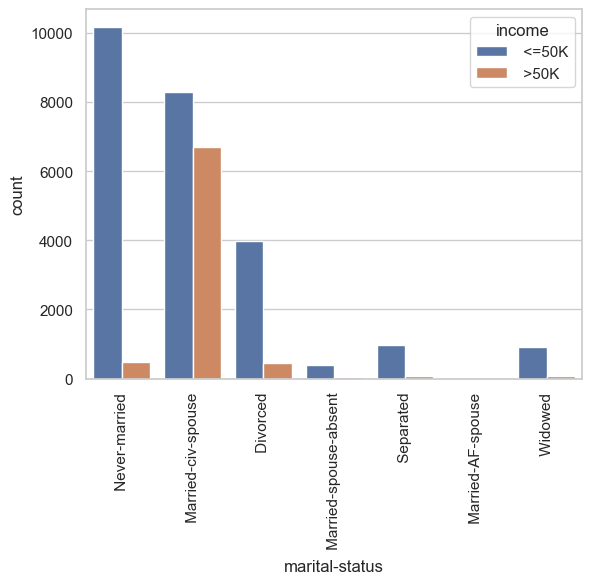

In [110]:
sns.countplot(df,x='marital-status',hue='income')
plt.xticks(rotation=90)
plt.show()

## Observation:

1. Most of the people earning >50K are Married-civ-spouse
2. Most of the people earning <=50K are Never-married
3. The differnece between two income groups in Never-married column is very high.

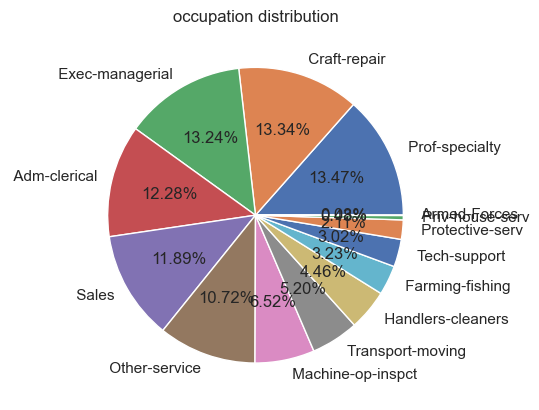

In [111]:
## Distribution of Occupation feature

occupation = df['occupation'].value_counts()

plt.pie(occupation,labels=occupation.index,autopct="%1.2f%%")
plt.title("occupation distribution")
plt.show()

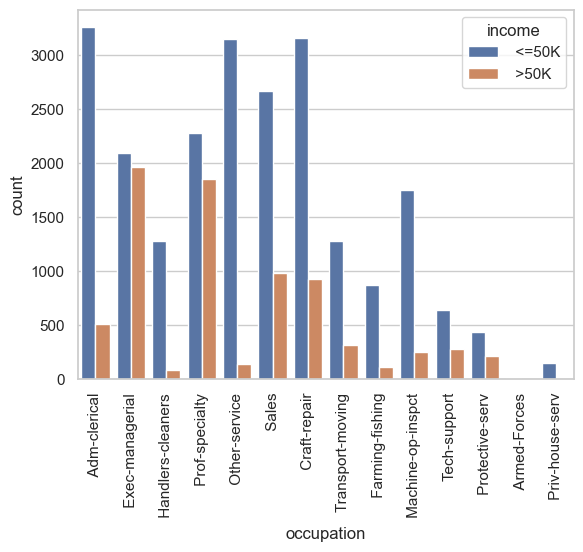

In [112]:
# relationship between occupation and income feature
sns.countplot(df,x='occupation',hue='income')
plt.xticks(rotation=90)
plt.show()

## Observation:

1. More People are earning >50K in Exec-managerial and Prof-speciality than other groups.

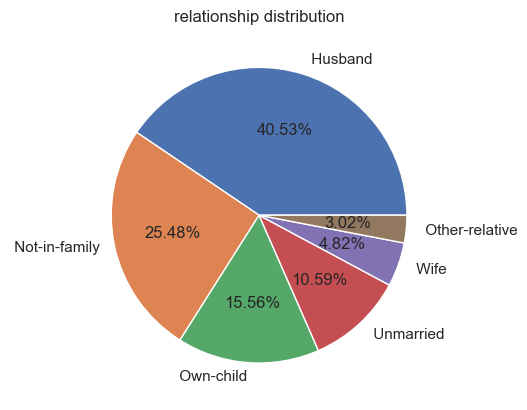

In [113]:
## Distribution of relationship feature

relationship = df['relationship'].value_counts()

plt.pie(relationship,labels=relationship.index,autopct="%1.2f%%")
plt.title("relationship distribution")
plt.show()

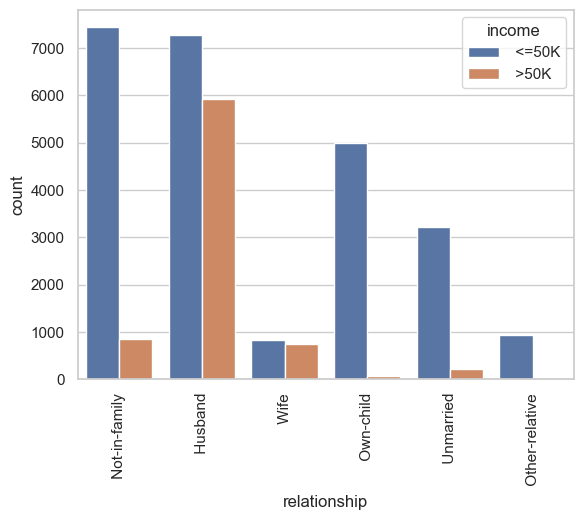

In [114]:
# relationship between relationship and income feature
sns.countplot(df,x='relationship',hue='income')
plt.xticks(rotation=90)
plt.show()

## Observation:

1. In relationship column, 40.5% are husband.
2. Husbands are more likely to earn >50K than others.

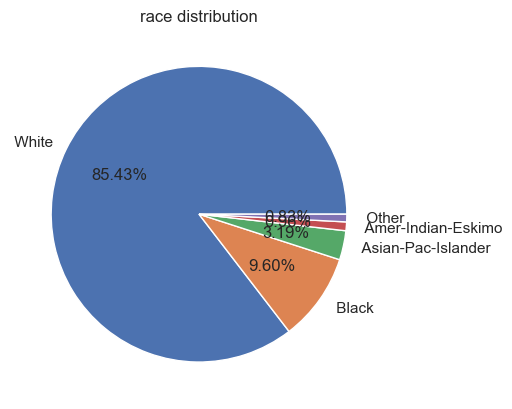

In [115]:
## Distribution of race feature

race = df['race'].value_counts()

plt.pie(race,labels=race.index,autopct="%1.2f%%")
plt.title("race distribution")
plt.show()

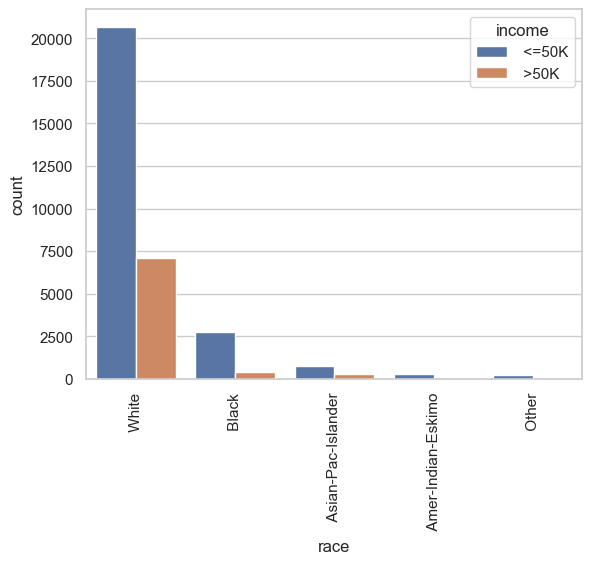

In [116]:
# relationship between race and income feature
sns.countplot(df,x='race',hue='income')
plt.xticks(rotation=90)
plt.show()

## Observation:

1. in race column, maximum people are White.
2. White people are more likely to earn income of >50K.

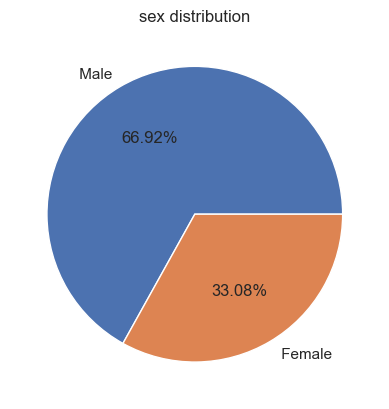

In [117]:
## Distribution of sex feature

sex = df['sex'].value_counts()

plt.pie(sex,labels=sex.index,autopct="%1.2f%%")
plt.title("sex distribution")
plt.show()

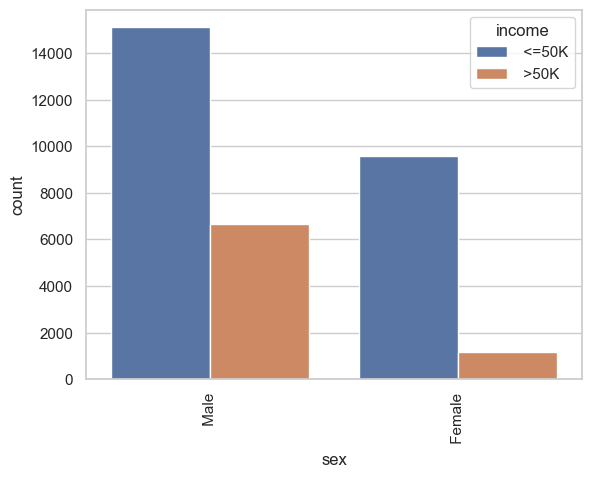

In [118]:
# relationship between sex and income feature
sns.countplot(df,x='sex',hue='income')
plt.xticks(rotation=90)
plt.show()

## Observation:

1. More male(66.9%) than female(33.1%) in sex column
2. Males are more likely to earn >50K than females.

In [31]:
## unique values in native-country feature

df['native-country'].nunique()

41

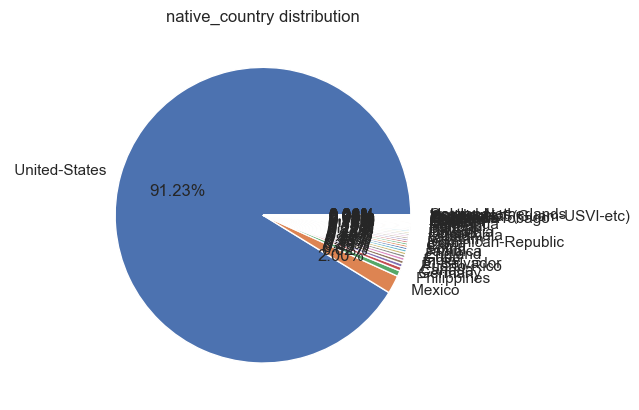

In [119]:
## Distribution of native-country feature

native_country = df['native-country'].value_counts()

plt.pie(native_country,labels=native_country.index,autopct="%1.2f%%")
plt.title("native_country distribution")
plt.show()

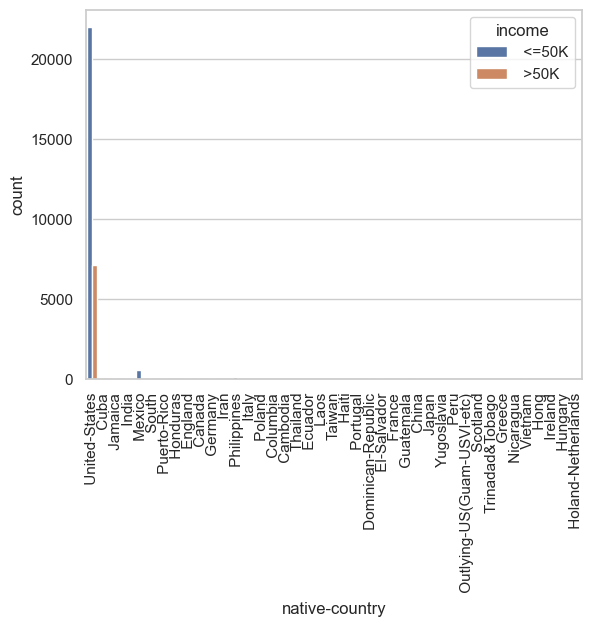

In [120]:
# relationship between native-country and income feature
sns.countplot(df,x='native-country',hue='income')
plt.xticks(rotation=90)
plt.show()

## Observation:

1. Total 41 unique countries are present.
2. Most datapoints(91.2%) are from united States.

## Numerical features

In [37]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [38]:
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [39]:
df[numerical_features].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


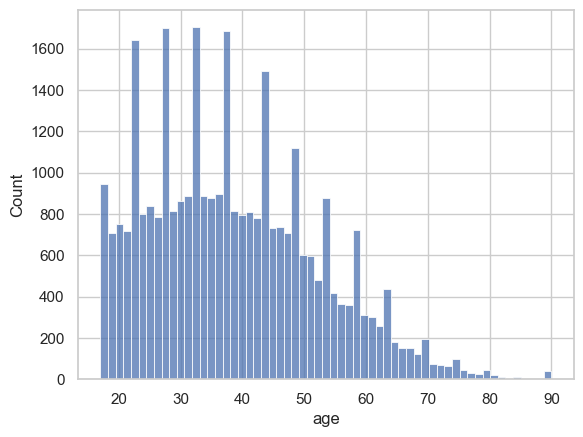

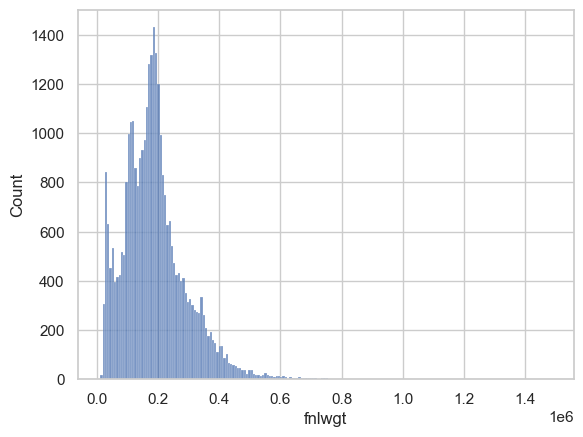

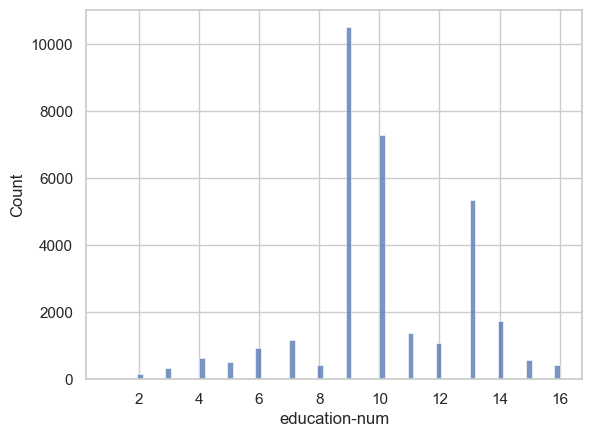

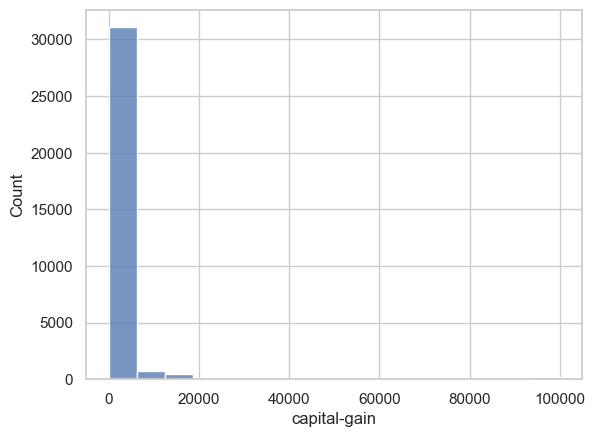

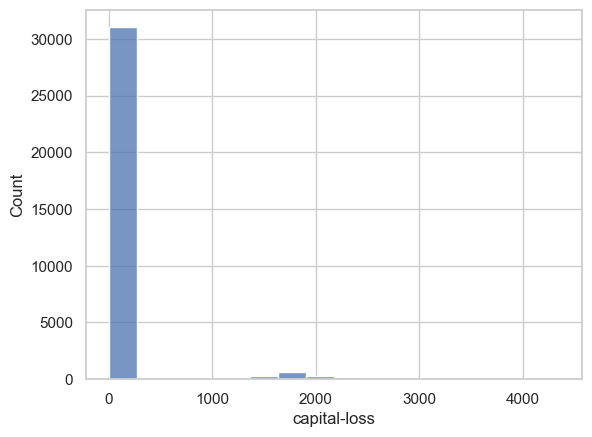

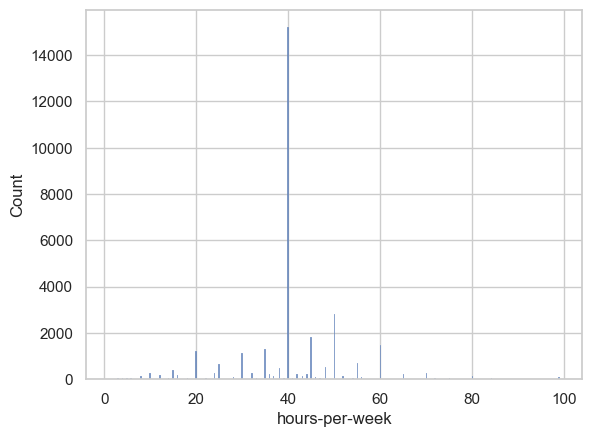

<Figure size 640x480 with 0 Axes>

In [123]:
## Distribution of numerical features
## Univariate analysis

for feature in numerical_features:
    sns.histplot(df,x=feature)
    plt.show()

plt.tight_layout()

## Observation:

1. The age column is sightly right-skewed or postively skewed.
2. Capital gain and capital loss are mostly 0
3. In 'hours-per-week' column, most datapoints are concentrated on 40.

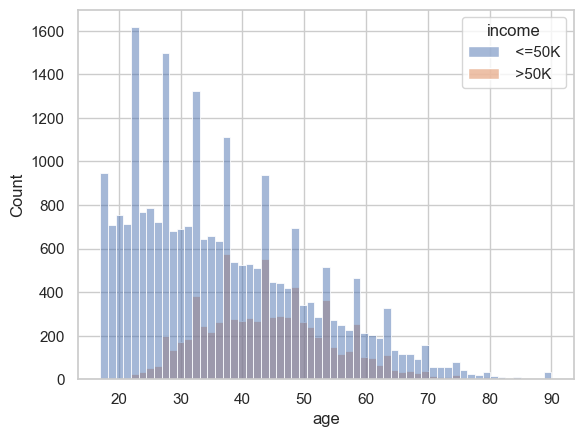

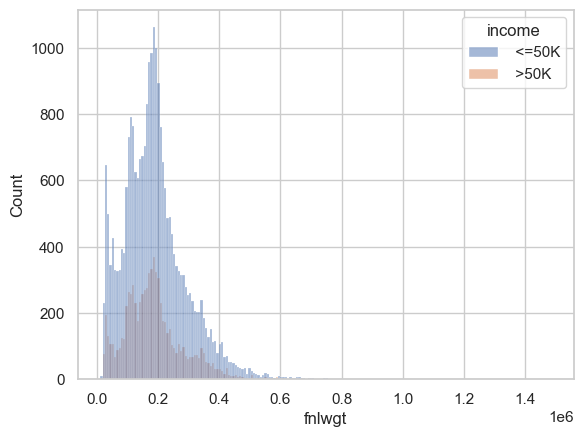

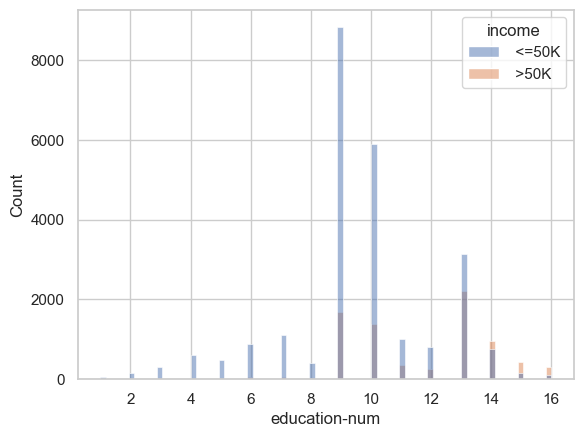

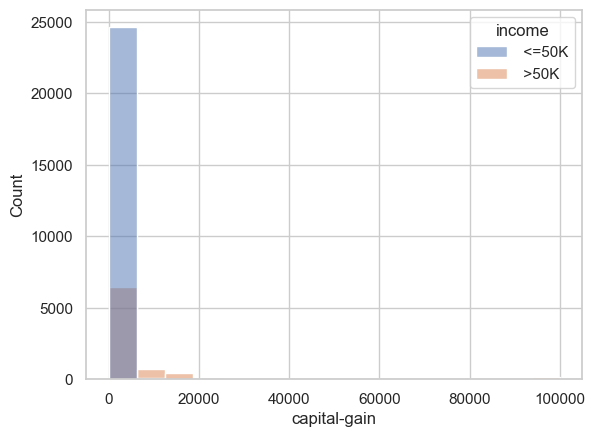

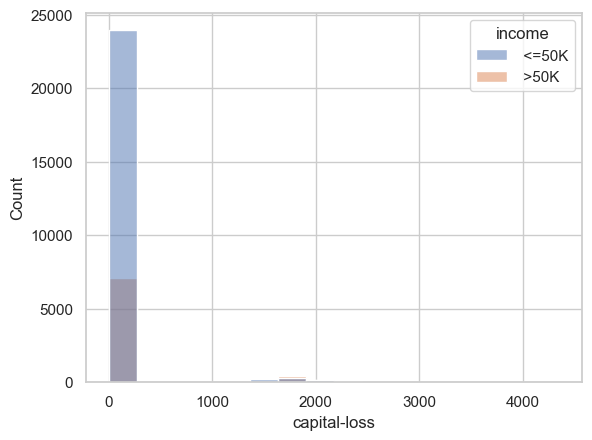

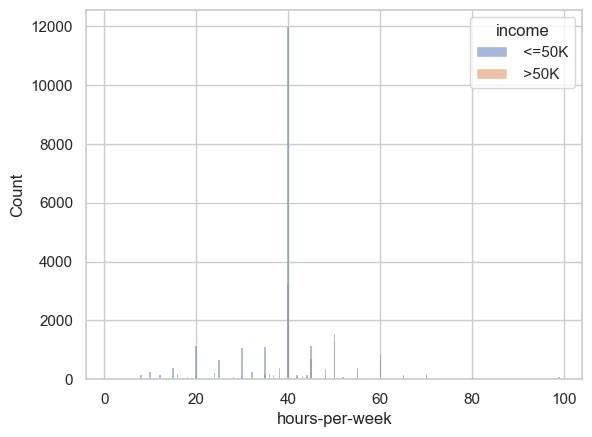

<Figure size 640x480 with 0 Axes>

In [124]:
for feature in numerical_features:
    sns.histplot(df,x=feature,hue='income')
    plt.show()

plt.tight_layout()

## Observation:

1. In 'age' column, most of the people earning >50K follows a different distribution than overall 'age' column distribution.
2. People with higher-education, are earning more income.
3. More the capital-gain, more income(>50K).


In [68]:
s = pd.crosstab(df['hours-per-week'],df['income'],normalize="index")

In [74]:
s

income,<=50K,>50K
hours-per-week,,
1,0.900000,0.100000
2,0.750000,0.250000
3,0.974359,0.025641
4,0.944444,0.055556
5,0.883333,0.116667
...,...,...
95,0.500000,0.500000
96,0.800000,0.200000
97,0.500000,0.500000


In [71]:
fig= px.bar(s,color_discrete_sequence=['#c789f0','#f0927a'])
fig.show()

<AxesSubplot: xlabel='hours-per-week'>

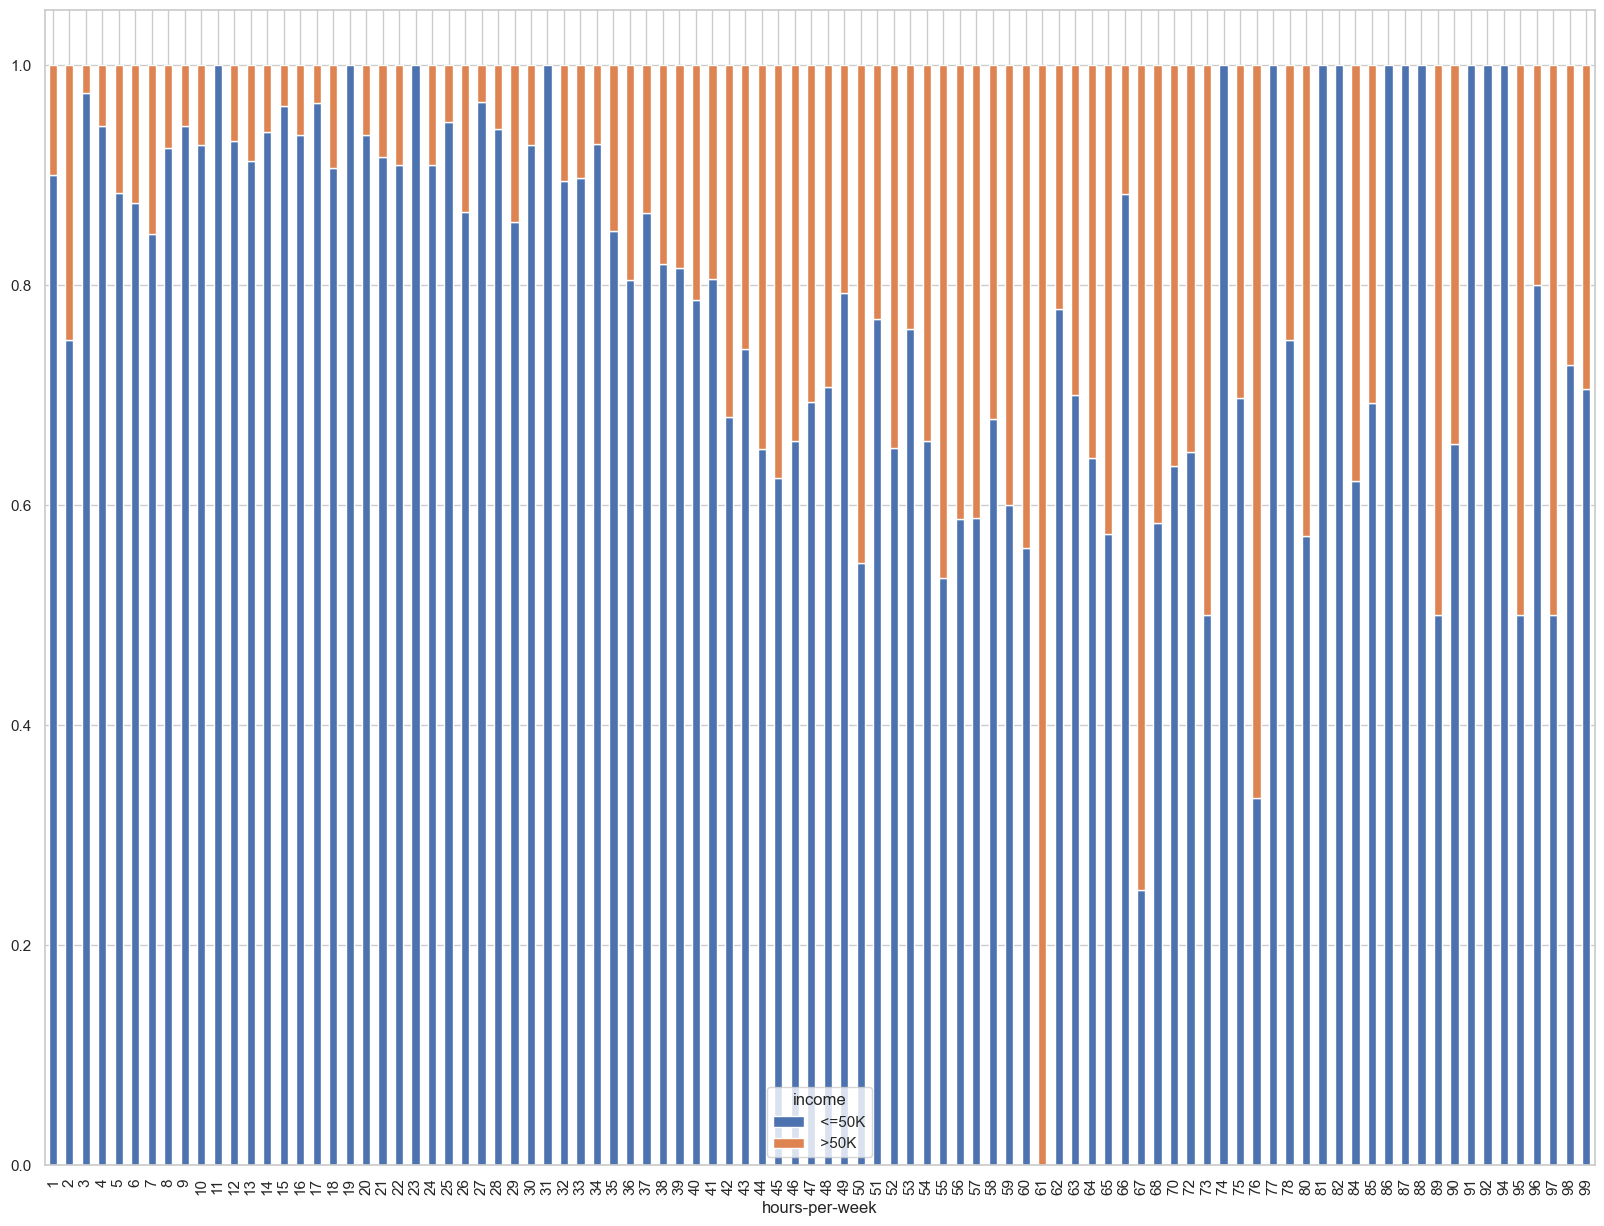

In [134]:
s.plot(kind='bar',stacked=True, figsize=(20,15))


## Observation:

1. Longer working hours does not mean higher income.

## Outliers

In [135]:
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

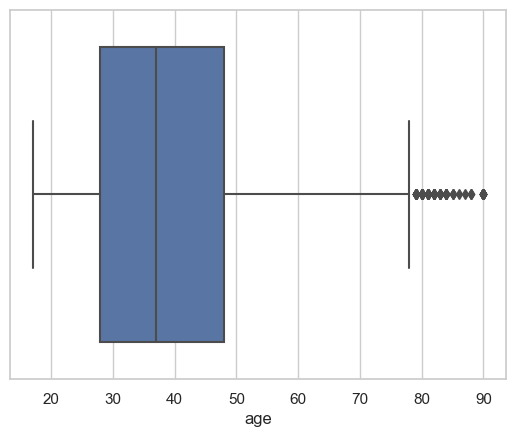

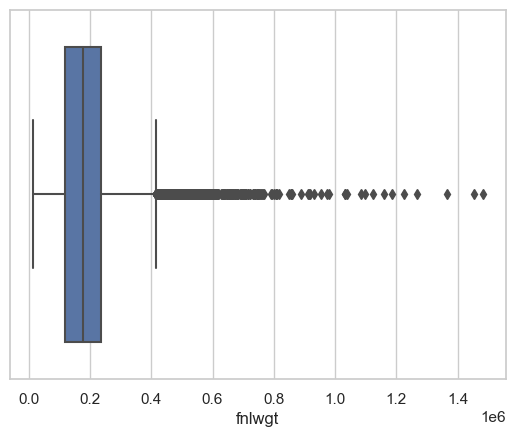

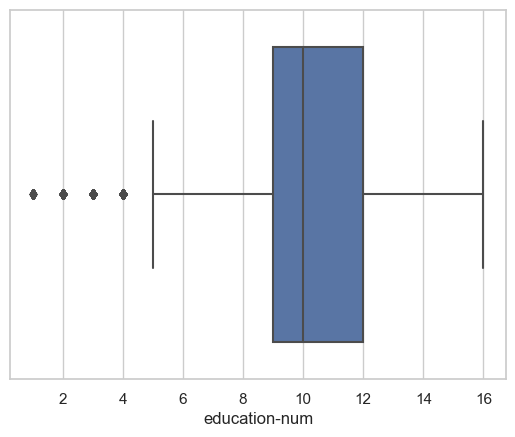

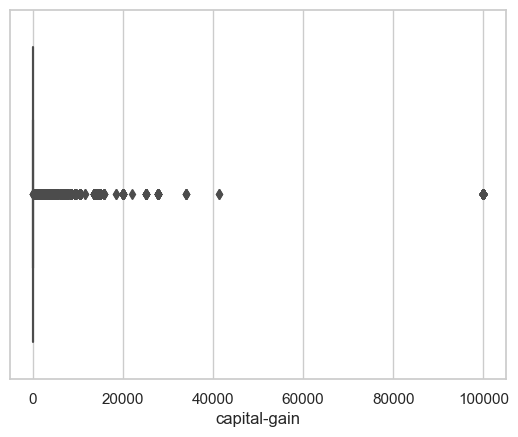

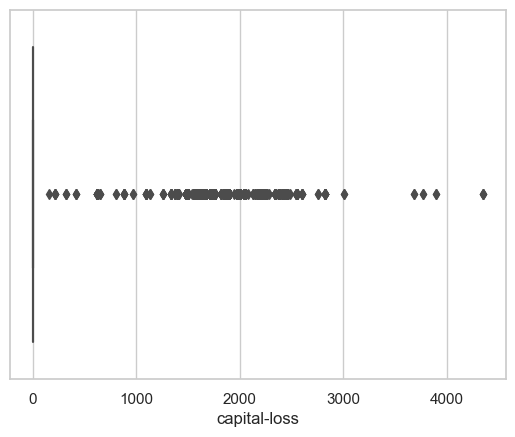

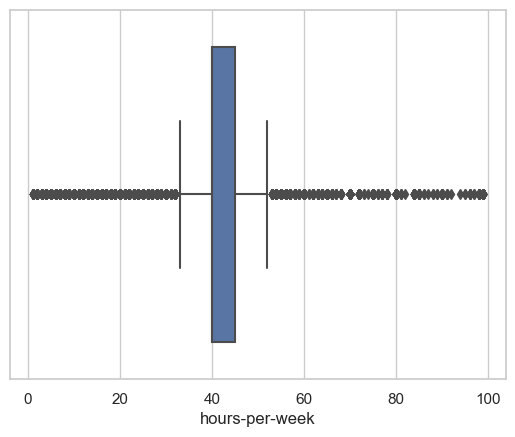

In [139]:
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.show()

## Observation:

1. There are outliers in all numerical features